###**DIP Practical-6**

**Name:** Yesha Pandya

**Enrolment Number:** 23BT04175

**Div:** 1 **Batch:** C

**Objective:**

Detection of Edges using Edge Detection algorithms like Canny, Sobel and Prewitt.

In [3]:
#import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

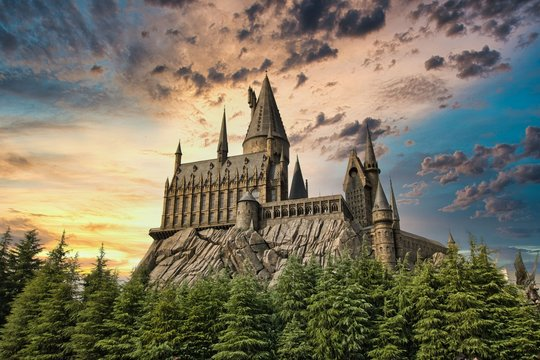

In [4]:
#load the image
img = cv2.imread('hogwarts image.jpg')

#convert to RGB for display (OpenCV loads as BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#convert to Grayscale for processing
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#apply Gaussian Blur to reduce noise (optional but recommended for better edge detection)
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)

#display original
cv2_imshow(img)

**Sobel Edge Detection**

The Sobel operator uses two $3 \times 3$ kernels which are convolved with the original image to calculate approximations of the derivatives—one for horizontal changes ($G_x$) and one for vertical changes ($G_y$).$$G = \sqrt{G_x^2 + G_y^2}$$

Sobel Edge Detection (Combined):


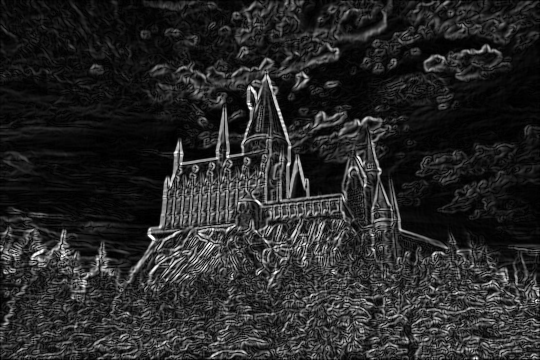

In [6]:
#calculate gradients in X and Y directions
sobel_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)

#convert back to 8-bit unsigned integers
abs_sobel_x = cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)

#combine the two gradients
sobel_combined = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

print("Sobel Edge Detection (Combined):")
cv2_imshow(sobel_combined)

**Prewitt Edge Detection**

OpenCV does not provide a direct function for Prewitt, so we manually define the kernels and apply them using `cv2.filter2D`. The Prewitt operator is similar to Sobel but uses simpler coefficients (all 1s) for smoothing. The kernels are:$$K_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} \quad \text{and} \quad K_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}$$

Prewitt Edge Detection:


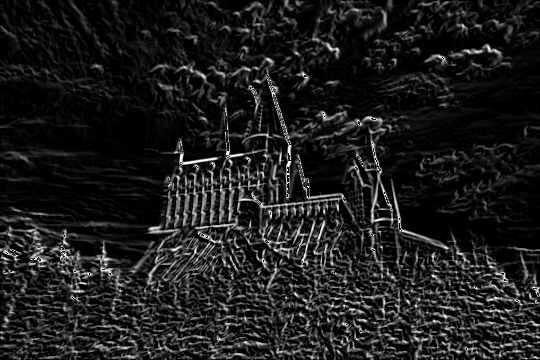

In [7]:
#define Prewitt kernels
kernel_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

#apply kernels to the image
prewitt_x = cv2.filter2D(img_blur, -1, kernel_x)
prewitt_y = cv2.filter2D(img_blur, -1, kernel_y)

#combine the two results (approximating magnitude by adding absolute values)
prewitt_combined = prewitt_x + prewitt_y

#display results
print("Prewitt Edge Detection:")
cv2_imshow(prewitt_combined)

**Canny Edge Detection**

Canny Edge Detection is a multi-stage algorithm:

* Noise Reduction: Applies Gaussian blur
* Gradient Calculation: Finds intensity gradients
* Non-maximum Suppression: Thins out edges to 1-pixel width
* Hysteresis Thresholding: Uses two thresholds (min and max) to link edges

Canny Edge Detection:


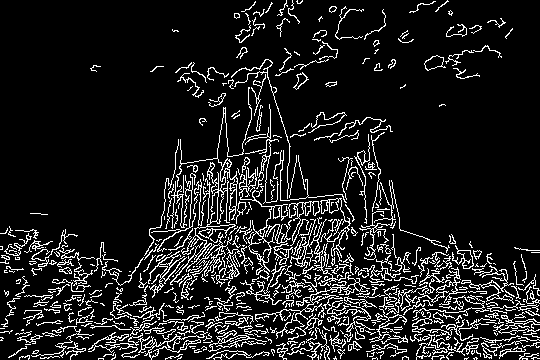

In [8]:
#we'll use the blurred image
#100 is the lower threshold, 200 is the upper threshold
canny_edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)

print("Canny Edge Detection:")
cv2_imshow(canny_edges)